In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import time
from scipy import signal
from scipy.fft import rfft,irfft,rfftfreq
from IPython.display import Image

### Q.1. 
#### Generate the following signal for 1 sec duration at sampling frequency of 200 Hz.
$$ x(t) = 9sin(2\pi f_{1}t) + 7sin(2\pi f_{2}t) + 5sin(2\pi f_{3}t) + 3sin(2\pi f_{4}t) $$
#### where $f_{1} = 5 Hz $, $f_{2} = 15 Hz $, $f_{3} = 25 Hz $ and $f_{4} = 50 Hz $
#### (a) Plot x(t).
#### (b) Determine the DFT of x(t) and plot its 1-sided magnitude spectrum (with frequency in Hz on x-axis).
#### (c) Generate a digital butterworth bandpass filter of order-6 (using scipy) with 10 Hz and 30 Hz as its lower and upper cutoff frequencies, respectively, and plot its magnitude spectrum.
#### (d) Multiply the frequency response of bandpass filter and DFT spectrum of x(t) to obtain the filtered spectrum and plot the same.
#### (e) Apply inverse DFT on the filtered spectrum to obtain the filtered signal and plot the same.


In [2]:
# Defining and initializing all variables

q1_fs = 200 # Sampling frequency
q1_f1 = 5
q1_f2 = 15
q1_f3 = 25
q1_f4 = 50

In [3]:
# Taking time interval of 1 second in steps of 1/sampling frequency
q1_t = np.arange(0.01,1.01,1/q1_fs)

# Function to calculate sinesoid
def sin_wave(a,f,phase,t):
    sine = a*np.sin(2*math.pi*f*t+phase)
    return sine

In [4]:
# Generating the given signal x(t)

q1_x = sin_wave(9,q1_f1,0,q1_t) + sin_wave(7,q1_f2,0,q1_t) + sin_wave(5,q1_f3,0,q1_t) + sin_wave(3,q1_f4,0,q1_t)

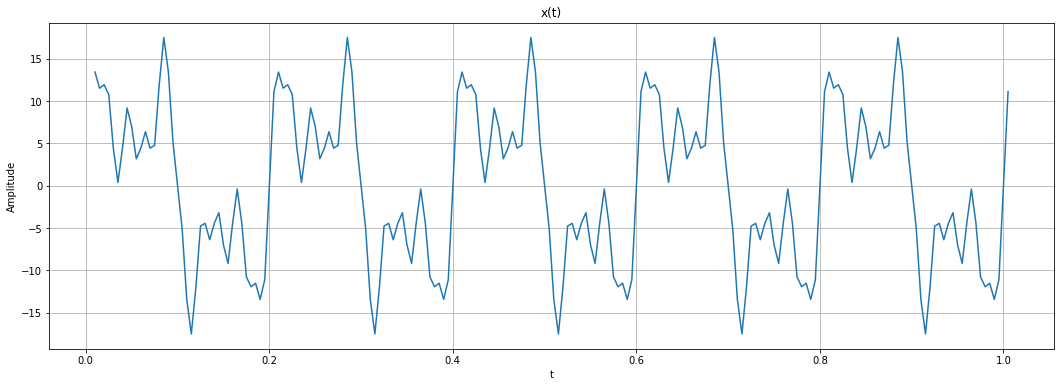

In [5]:
# PLotting the result

plt.figure(figsize=(18,6))
plt.plot(q1_t,q1_x)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('x(t)')
plt.grid()
plt.show()

In [6]:
# Calculating one sided DFT using scipy.fft.rfft

q1_DFT = rfft(q1_x)
q1_DFT_freq = rfftfreq(q1_fs,1/q1_fs)

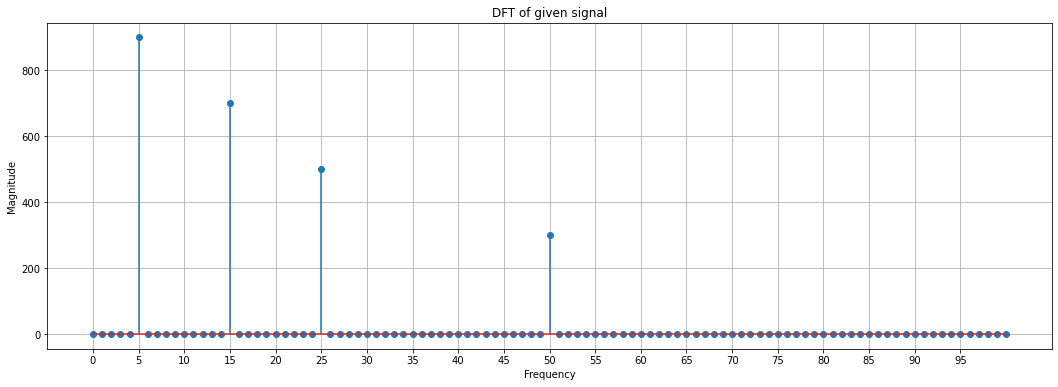

In [7]:
# Plotting the DFT spectrum

plt.figure(figsize=(18,6))

plt.stem(q1_DFT_freq,abs(q1_DFT))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of given signal')
plt.xticks(np.arange(0,100,5))
plt.grid()
plt.show()

In [8]:
# Generating bandpass butterworth filter of order 6 with given parameters using signal.butter function

q1_b, q1_a = signal.butter(N=6,Wn=[10,30],btype='bandpass',analog=False,fs=200)

In [9]:
# Computing frequency response of butterworth filter using signa;.freqz

q1_w, q1_h = signal.freqz(q1_b, q1_a,worN=100)

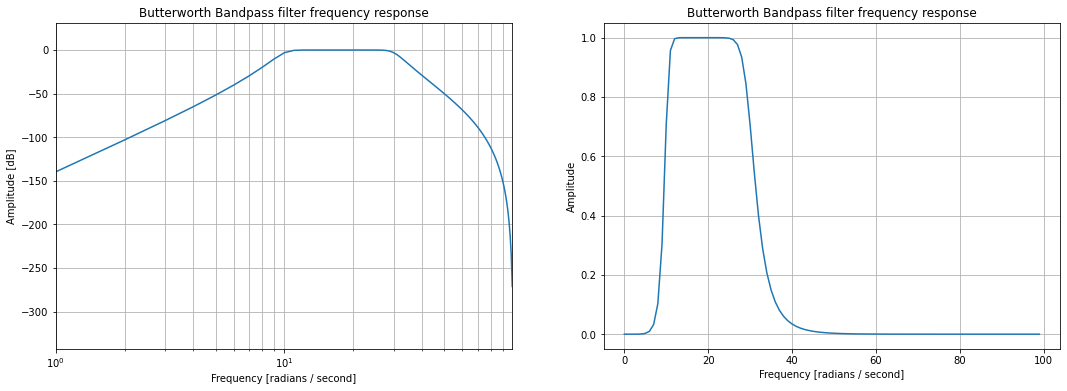

In [10]:
# Plotting the resultant magnitude spectrum of butterworth filter

q1_f = q1_w/(2*np.pi)*q1_fs

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.semilogx(q1_f, 20 * np.log10(abs(q1_h)))
plt.title('Butterworth Bandpass filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)

plt.subplot(122)
plt.plot(q1_f,(abs(q1_h)))
plt.title('Butterworth Bandpass filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude')
plt.grid()

plt.show()

In [11]:
# Multiplying DFT of x(t) and magnitude spectrum of butterworth filter

q1_filter_spec = np.multiply(q1_DFT[0:100],q1_h)

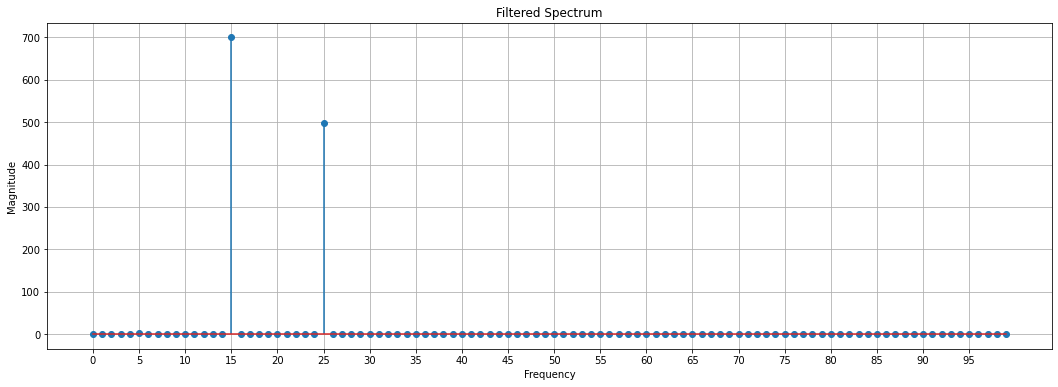

In [12]:
# PLotting the filtered spectrum. Frequency outside range (10,30) has been removed

plt.figure(figsize=(18,6))

plt.stem(abs(q1_filter_spec))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Filtered Spectrum')
plt.xticks(np.arange(0,100,5))
plt.grid()
plt.show()

In [13]:
# Computing inverse DFT of filtered spectrum 

q1_filter_signal = irfft(q1_filter_spec)

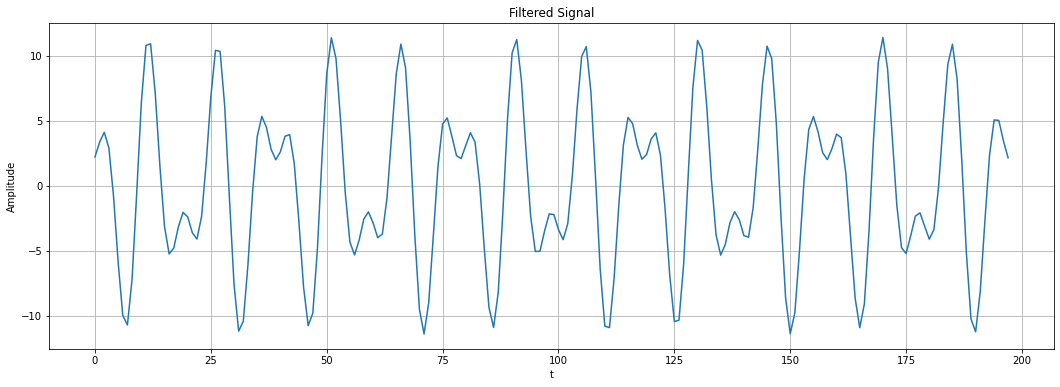

In [14]:
# Plotting the filtered signal

plt.figure(figsize=(18,6))

plt.plot(q1_filter_signal)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Filtered Signal')
plt.grid()

plt.show()

### Q.2.
#### Design a 2-pole band-stop filter that has the centre of its stop band at $ω = \frac{π}{2}$ and peak in its frequency response characteristic at ω = 0 and ω = π, and a magnitude response of $\frac{1}{\sqrt{2}}$ at ω = $\frac{4\pi}{9}$
#### (a) Determine the transfer function of the filter (calculate manually) and plot its magnitude and phase spectra.
#### (b) Multiply the frequency response of band-stop filter and DFT spectrum of x(t) (of Question No. 1) to obtain the filtered spectrum and plot the same.
#### (c) Apply inverse DFT on the filtered spectrum to obtain the filtered signal and plot the same.

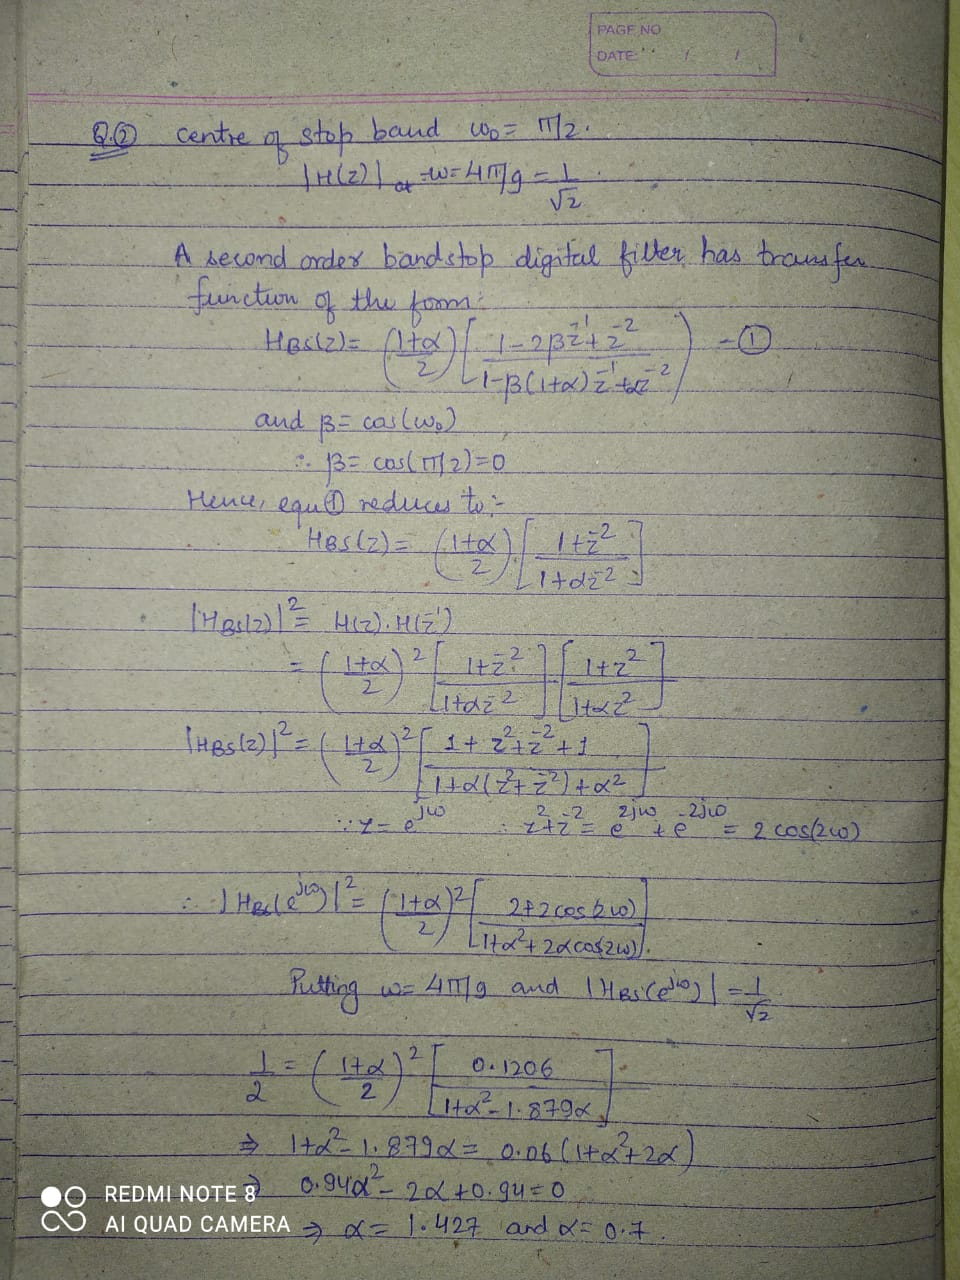

In [72]:
Image(filename='Q2(i).jpeg',width=400, height=200)

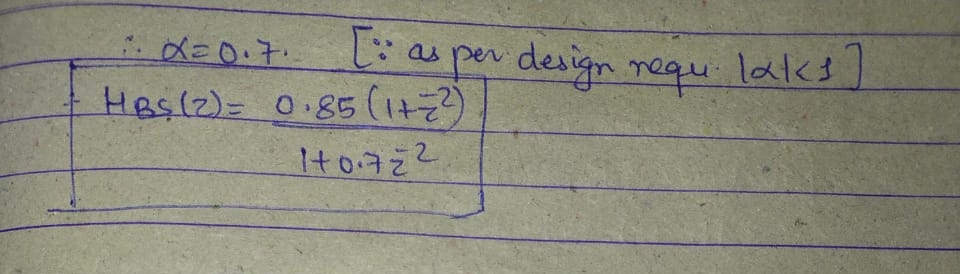

In [73]:
Image(filename='Q2(ii).jpeg',width=400, height=200)

In [74]:
# Storing the transfer function in form of array 

q2_b = [0.85,0,0.85]
q2_a = [1,0,0.7]

In [75]:
# Calculating the frequency response of the calculated filter

q2_w = np.linspace(0.0,np.pi,101)
q2_w,q2_h = signal.freqz(b=q2_b,a=q2_a,worN=q2_w)

In [76]:
# Converting the range of frequency from (0,pi) to (0,sampling frequency/2)

q2_f = q2_w*q1_fs / (2*np.pi)

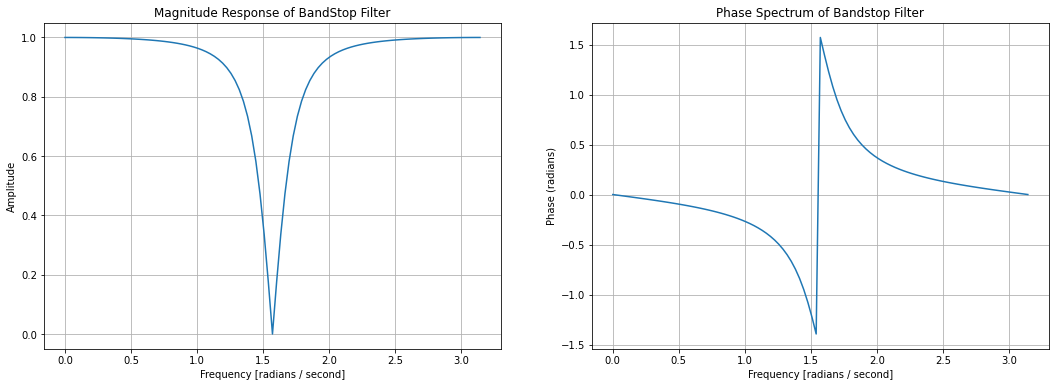

In [20]:
# Plotting the magnitude and phase reponse of filter

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q2_w,abs(q2_h))
plt.title('Magnitude Response of BandStop Filter')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(122)
plt.plot(q2_w,np.angle(q2_h))
plt.title('Phase Spectrum of Bandstop Filter')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase (radians)')
plt.grid()

plt.show()

In [21]:
# Multiplying the frequency response of filter with DFT of x(t)

q2_filtered_spec = np.multiply(q1_DFT,q2_h)

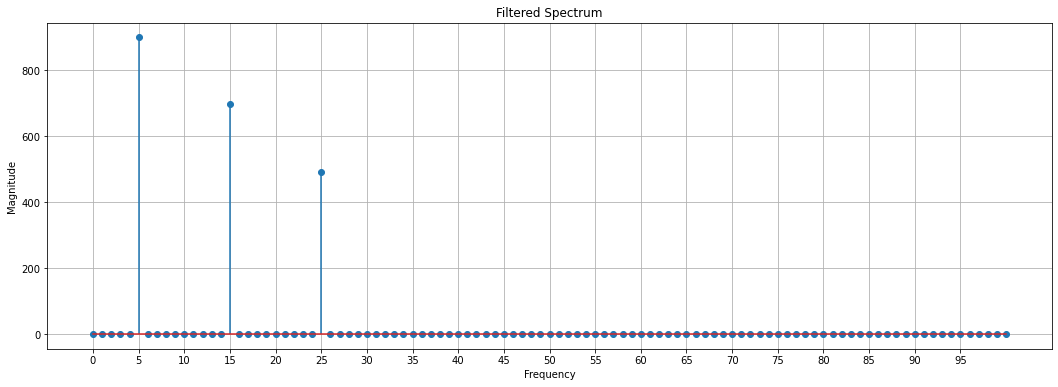

In [22]:
# Plotting the filtered spectrum

plt.figure(figsize=(18,6))

plt.stem(abs(q2_filtered_spec))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Filtered Spectrum')
plt.xticks(np.arange(0,100,5))
plt.grid()
plt.show()

In [23]:
# Computing inverse DFT of filtered spectrum

q2_filter_signal = irfft(q2_filtered_spec)

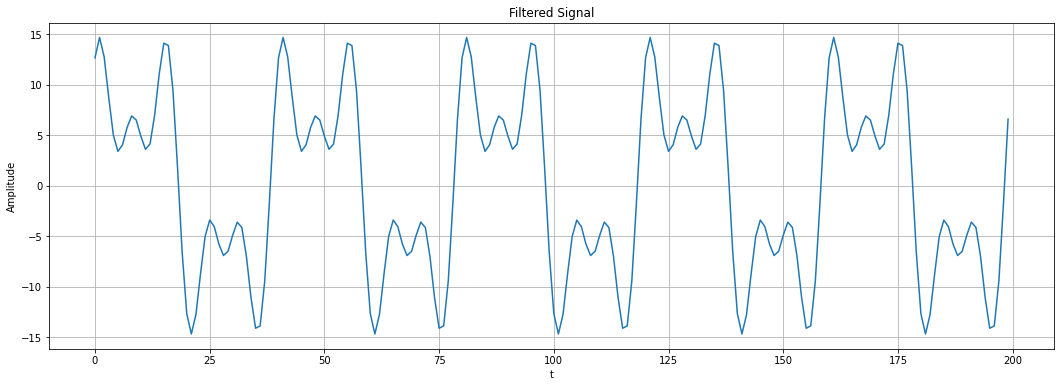

In [24]:
# Plotting the filtered signal

plt.figure(figsize=(18,6))

plt.plot(q2_filter_signal)
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Filtered Signal')
plt.grid()

plt.show()

### Q.3. 
#### For the digital filter shown below
$$ H(z) = \frac{-0.2+0.18z^{-1}+0.4z^{-2}+z^{-3}}{1+0.4z^{-1}+0.18z^{-2}-0.2z^{-3}} $$
#### (a) Determine the poles and zeros of H(z). What type of filter is this? Is there any relationship between the poles and zeros of H(z). If yes, explain the same.
#### (b) Plot the magnitude and phase spectra of H(z).

In [25]:
# Storing the coefficients of the transfer function and computing its roots

q3_num = [-0.2,0.18,0.4,1]
q3_den = [1,0.4,0.18,-0.2]


q3_zeros = np.roots(q3_num)
q3_poles = np.roots(q3_den)

In [26]:
print(f'The zeros of given Transfer Function is:\n1. {q3_zeros[0]} \n2. {q3_zeros[1]}\n3. {q3_zeros[2]}')
print(f'The poles of given Transfer Function is:\n1. {q3_poles[0]} \n2. {q3_poles[1]}\n3. {q3_poles[2]}')

The zeros of given Transfer Function is:
1. (2.5000000000000004+0j) 
2. (-0.8000000000000006+1.1661903789690609j)
3. (-0.8000000000000006-1.1661903789690609j)
The poles of given Transfer Function is:
1. (-0.40000000000000024+0.5830951894845302j) 
2. (-0.40000000000000024-0.5830951894845302j)
3. (0.4+0j)


In [27]:
print(f'There exist a relation between Poles and Zeros of the given system. The zeros are inverse of the given poles')
print(f'The given Filter is  all pass filter')

There exist a relation between Poles and Zeros of the given system. The zeros are inverse of the given poles
The given Filter is  all pass filter


In [28]:
# Computing the frequency response of the given filter

q3_w, q3_h = signal.freqz(b=q3_num,a=q3_den,worN=1000)

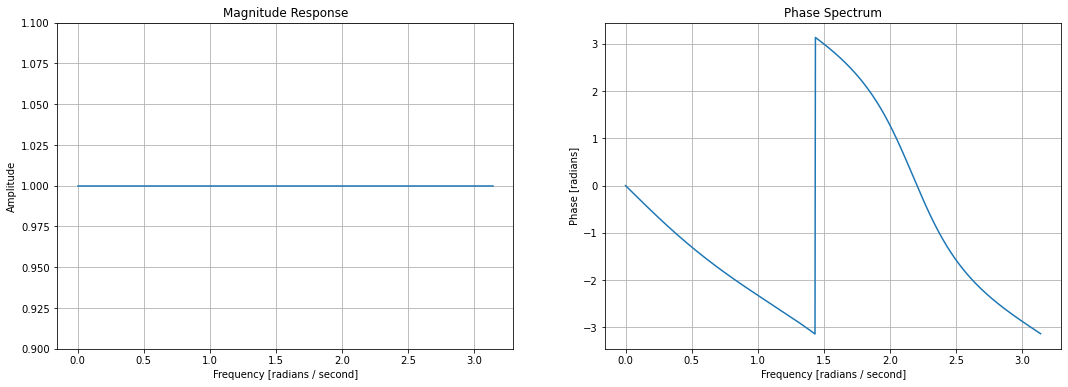

In [29]:
# Plotting the result

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q3_w, (abs(q3_h)))
plt.title('Magnitude Response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude')
plt.ylim(0.9,1.1)
plt.grid()

plt.subplot(122)
plt.plot(q3_w, np.angle(q3_h))
plt.title('Phase Spectrum')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [radians]')
plt.grid()

plt.show()

### Q.4.
#### Design a third-order digital highpass Chebyshev filter with a cutoff frequency of 2 kHz and 1 dB ripple on the passband at a sampling frequency of 8,000 Hz.
#### (a) Determine the transfer function and the difference equation.
#### (b) Plot the magnitude and phase frequency responses.
#### (c) Find the zeros and poles, and plot them.

$$ H(z) = \frac{0.1321-0.3964z^{-1}+0.3964z^{-2}-0.1321z^{-3}}{1+0.3432z^{-1}+0.6044z^{-2}+0.2041z^{-3}} $$

$$ y(n) = -0.3432y(n-1)-0.6044y(n-2)-0.2041y(n-3)+0.1321x(n)-0.3964x(n-1)+0.3964x(n-2)-0.1321x(n-3) $$

In [30]:
# Computing the coefficients of Chebyshev filter using signal.cheby1

q4_b,q4_a = signal.cheby1(N=3,rp=1,Wn=2000,btype='highpass',fs = 8000)

In [31]:
print(f'The filter coefficients are:\nNumerator\n{q4_b}\nDenominator\n{q4_a}')

The filter coefficients are:
Numerator
[ 0.13214071 -0.39642212  0.39642212 -0.13214071]
Denominator
[1.         0.34319322 0.60439354 0.20407467]


In [32]:
# Computing frequency reponse of the chebyshev filter

q4_w = np.linspace(0.01,np.pi,1000)
q4_w,q4_h = signal.freqz(b=q4_b,a=q4_a,worN=q4_w)

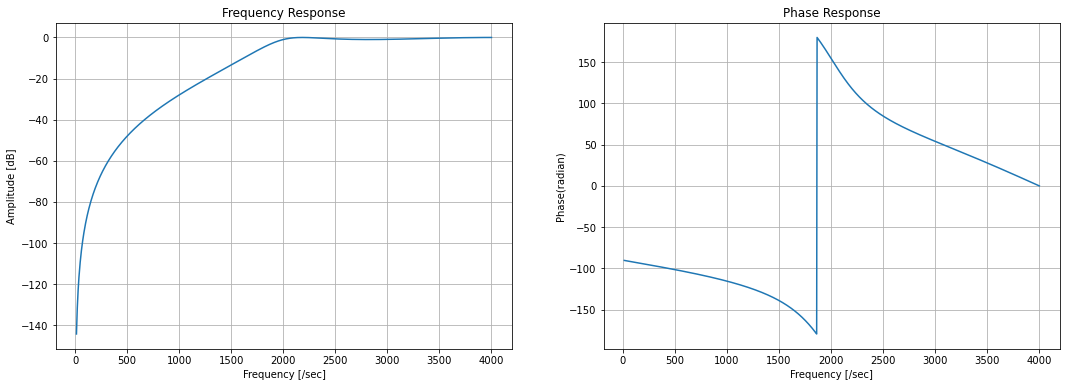

In [33]:
# Plotting the result

q4_f = q4_w*8000 / (2*np.pi)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q4_f,20*np.log10(abs(q4_h)))
plt.title('Frequency Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Amplitude [dB]')
plt.grid()

plt.subplot(122)
plt.plot(q4_f,np.angle(q4_h)*180/np.pi)
plt.title('Phase Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Phase(radian)')
plt.grid()

plt.show()

In [34]:
# Finding poles and zeros

q4_poles = np.roots(q4_a)
q4_zeros = np.roots(q4_b)

In [35]:
print(f'The poles of given Transfer Function is:')
q4_poles

The poles of given Transfer Function is:


array([-0.00232899+0.77640918j, -0.00232899-0.77640918j,
       -0.33853523+0.j        ])

In [36]:
print(f'The zeros of given Transfer Function is:')
q4_zeros

The zeros of given Transfer Function is:


array([1.00000205+3.55693933e-06j, 1.00000205-3.55693933e-06j,
       0.99999589+0.00000000e+00j])

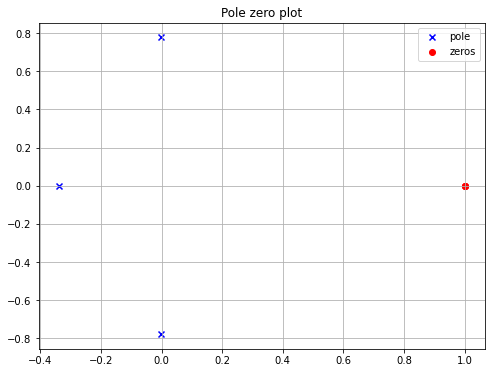

In [37]:
# Plotting the pole zero plot

plt.figure(figsize=(8,6))
plt.scatter(q4_poles.real,q4_poles.imag,marker="x",label='pole',c='blue')
plt.scatter(q4_zeros.real,q4_zeros.imag,marker="o",label='zeros',c='red')
plt.title('Pole zero plot')
plt.grid()
plt.legend()
plt.show()

### Q.5.
#### Design a digital lowpass Butterworth filter with the following specifications:
#### (a) 3 dB attenuation at the passband frequency of 1.5 kHz
#### (b) 10 dB stopband attenuation at the frequency of 3 kHz
#### (c) Sampling frequency of 8, 000 Hz.
#### Plot the magnitude and phase responses.

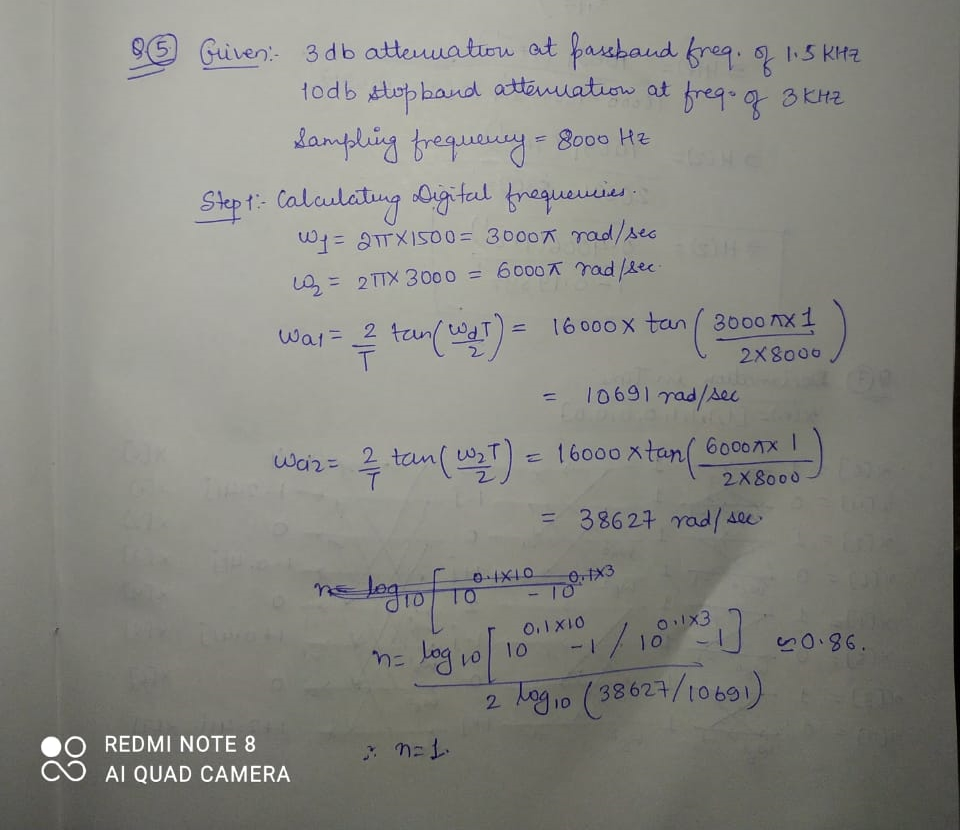

In [38]:
Image(filename='Q5.jpeg',width=400, height=200)

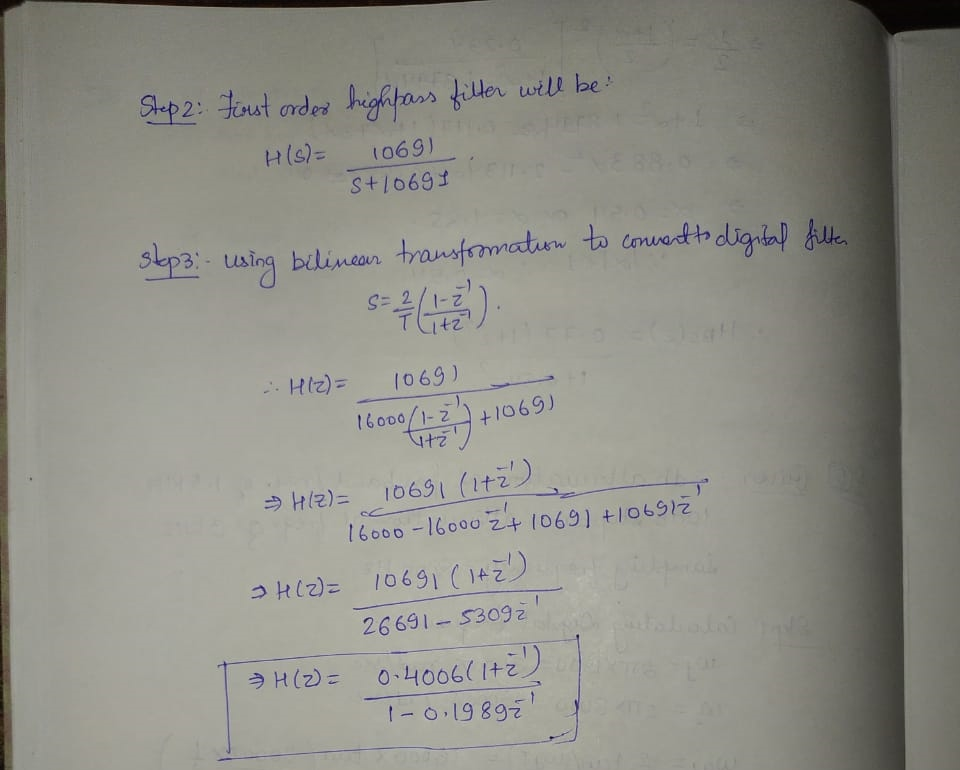

In [39]:
Image(filename='Q5,7.jpeg',width=400, height=200)

$$ H(z) = \frac{0.4006+0.4006z^{-1}}{1-0.1989z^{-1}}$$

In [40]:
# Storing the coefficients of filter

q5_a = [1,-0.1989]
q5_b = [0.4006,0.4006]

In [41]:
# Computing the frequency response 

q5_w,q5_h = signal.freqz(b=q5_b,a=q5_a,worN=1000)

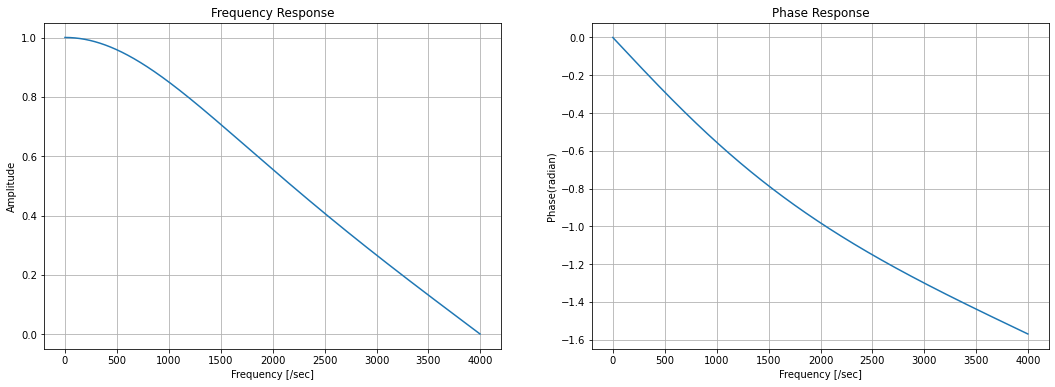

In [42]:
# Plotting the result

q5_f = q5_w*8000 / (2*np.pi)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q5_f,abs(q5_h))
plt.title('Frequency Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(122)
plt.plot(q5_f,np.arctan(q5_h.imag/q5_h.real))
plt.title('Phase Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Phase(radian)')
plt.grid()

plt.show()

### Q.6.
#### Fast Fourier Transform (FFT)
#### Consider a random sequence x[n] of length N = 1024.
#### (a) Write a function to compute the DFT of the sequence. How many operations are required for computing the DFT? Don’t use any inbuilt function for this part. After implementation, compute the time taken by the code to run using the time library.
#### (b) Compute the DFT of sequence using np.fft. Compute the time taken by the code to run using the time library.
#### (c) Are the implementations in part (a) and part (b) similar? Compare the closeness and compute time for both the parts? What can be concluded?
#### (d) Vary the number of samples N from 1, 2, 4, 8, ..., 2048. For each N compare the performance in terms of time for DFT implemented in part (a) and FFT implemented in part (b). Plot a graph for the same.

In [43]:
q6_len = 1024

q6_random_x = np.random.random_sample(q6_len)

In [44]:
def DFT_seq(x):
    
    N = len(x)
    temp_mat = np.zeros((N,N),dtype=np.complex64)
    
    for i in range(N):
        for n in range(N):
            temp_mat[i][n] = np.exp(-1j*2*np.pi*i*n/N)
            
    DFT_x = np.dot(temp_mat,x)
    return DFT_x

In [45]:
q6_DFT_start = time.time()
q6_DFT = DFT_seq(q6_random_x)
q6_DFT_end = time.time()

In [46]:
print(f'The time taken to compute DFT using custom function is: {q6_DFT_end - q6_DFT_start}')

The time taken to compute DFT using custom function is: 1.8101558685302734


In [47]:
q6_FFT_start = time.time()

q6_FFT = np.fft.fft(q6_random_x)

q6_FFT_end = time.time()

In [48]:
print(f'The time taken to compute DFT using custom function is: {q6_FFT_end - q6_FFT_start}')

The time taken to compute DFT using custom function is: 0.000997304916381836


In [49]:
q6_N_list = np.power(2,range(0,12))

q6_DFT_time = []
q6_FFT_time = []

for n in q6_N_list:
    q6_random_xn = np.random.random_sample(n)
    
    q6_DFT_start_n = time.time()
    q6_DFT_n = DFT_seq(q6_random_xn)
    q6_DFT_end_n = time.time()
    
    q6_DFT_time.append(q6_DFT_end_n - q6_DFT_start_n)
    
    q6_FFT_start_n = time.time()
    q6_FFT_n = np.fft.fft(q6_random_xn)
    q6_FFT_end_n = time.time()
    
    q6_FFT_time.append(q6_FFT_end_n - q6_FFT_start_n)

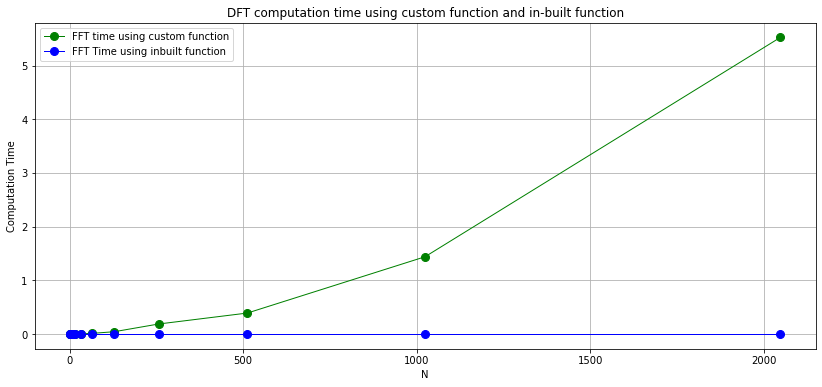

In [50]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(q6_N_list,q6_DFT_time,color='green',lw=1,ls='-',marker='o',markersize=8,label='FFT time using custom function')
ax.plot(q6_N_list,q6_FFT_time,color="blue",lw=1,ls='-',marker='o',markersize=8,label='FFT Time using inbuilt function')

ax.set_xlabel('N')
ax.set_ylabel('Computation Time')
ax.set_title('DFT computation time using custom function and in-built function')
ax.legend()
ax.grid()

### Q.7.
#### Consider a sequence x[n] = {1, 1, 1, 1, 0, 0, 0, 0}, compute the DFT of the following sequence using 8-point radix-2 DIT-FFT algorithm. Plot the sequence and the resulting DFT. Also compute the time taken to run the code.

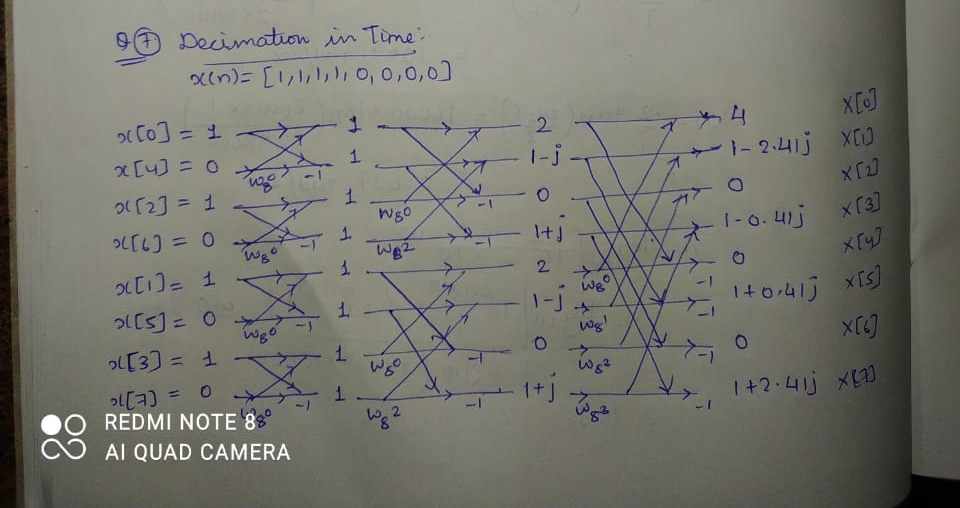

In [51]:
Image(filename='Q5,7 - Copy.jpeg',width=400, height=200)

In [52]:
q7_x = [1,1,1,1,0,0,0,0]

q7_x1 = np.zeros(len(q7_x),dtype=np.complex64)
q7_x2 = np.zeros(len(q7_x),dtype=np.complex64)
q7_x3 = np.zeros(len(q7_x),dtype=np.complex64)

q7_w = np.exp(-1j*2*np.pi/len(q7_x))

In [53]:
q7_DIT_start_n = time.time()

# Splitting the given data as {(0,4),(2,6),(1,5),(3,7)} and computing 2 point DFT of each pair

# 2 point DFT between index 0 and 4
q7_x1[0] = q7_x[0] + q7_x[4]
q7_x1[1] = q7_x[0] - q7_x[4]

# 2 point DFT between index 2 and 6
q7_x1[2] = q7_x[2] + q7_x[6]
q7_x1[3] = q7_x[2] - q7_x[6]

# 2 point DFT between index 1 and 5
q7_x1[4] = q7_x[1] + q7_x[5]
q7_x1[5] = q7_x[1] - q7_x[5]

# 2 point DFT between index 3 and 7
q7_x1[6] = q7_x[3] + q7_x[7]
q7_x1[7] = q7_x[3] - q7_x[7]


# Combining 2 point DFT of even and odd sequences

# Even Sequences
q7_x2[0] = q7_x1[0] + (q7_w**0)*q7_x1[2]
q7_x2[1] = q7_x1[1] + (q7_w**2)*q7_x1[3]
q7_x2[2] = q7_x1[0] - (q7_w**0)*q7_x1[2]
q7_x2[3] = q7_x1[1] - (q7_w**2)*q7_x1[3]

# Odd sequence
q7_x2[4] = q7_x1[4] + (q7_w**0)*q7_x1[6]
q7_x2[5] = q7_x1[5] + (q7_w**2)*q7_x1[7]
q7_x2[6] = q7_x1[4] - (q7_w**0)*q7_x1[6]
q7_x2[7] = q7_x1[5] - (q7_w**2)*q7_x1[7]


# Combining 4 point DFTs 

q7_x3[0] = q7_x2[0] + (q7_w**0)*q7_x2[4]
q7_x3[1] = q7_x2[1] + (q7_w**1)*q7_x2[5]
q7_x3[2] = q7_x2[2] + (q7_w**2)*q7_x2[6]
q7_x3[3] = q7_x2[3] + (q7_w**3)*q7_x2[7]
q7_x3[4] = q7_x2[0] - (q7_w**0)*q7_x2[4]
q7_x3[5] = q7_x2[1] - (q7_w**1)*q7_x2[5]
q7_x3[6] = q7_x2[2] - (q7_w**2)*q7_x2[6]
q7_x3[7] = q7_x2[3] - (q7_w**3)*q7_x2[7]

q7_DIT_end_n = time.time()

In [54]:
q7_x3

array([4.+0.j        , 1.-2.4142137j , 0.+0.j        , 1.-0.41421357j,
       0.+0.j        , 1.+0.41421357j, 0.+0.j        , 1.+2.4142137j ],
      dtype=complex64)

In [55]:
print('The FFT of the given signal using DIT is:\n')
for q7_xn,q7_xi in enumerate(q7_x3):
    print(f"X[{q7_xn}] = {q7_xi}")
    
print(f'\nThe time taken to calculate DIT is:{q7_DIT_end_n-q7_DIT_start_n}')

The FFT of the given signal using DIT is:

X[0] = (4+0j)
X[1] = (1-2.4142136573791504j)
X[2] = 0j
X[3] = (1-0.4142135679721832j)
X[4] = 0j
X[5] = (1+0.4142135679721832j)
X[6] = 0j
X[7] = (1+2.4142136573791504j)

The time taken to calculate DIT is:0.0009999275207519531


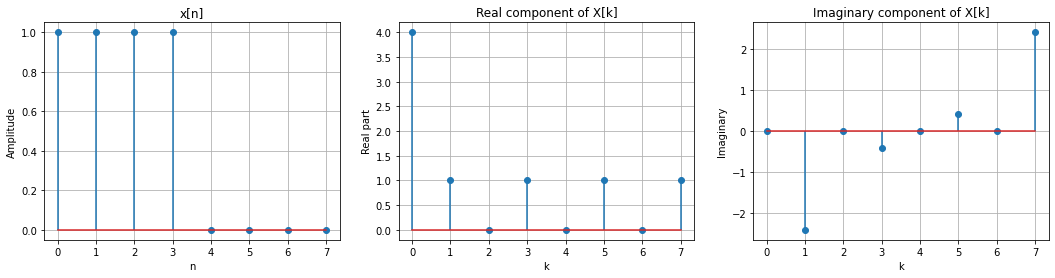

In [56]:
# Plotting the result
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.stem(np.arange(len(q7_x)),q7_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.grid()

plt.subplot(132)
plt.stem(np.arange(len(q7_x)),q7_x3.real)
plt.xlabel('k')
plt.ylabel('Real part')
plt.title('Real component of X[k]')
plt.grid()
           
plt.subplot(133)
plt.stem(np.arange(len(q7_x)),q7_x3.imag)
plt.xlabel('k')
plt.ylabel('Imaginary')
plt.title('Imaginary component of X[k]')
plt.grid()       
           

plt.show()

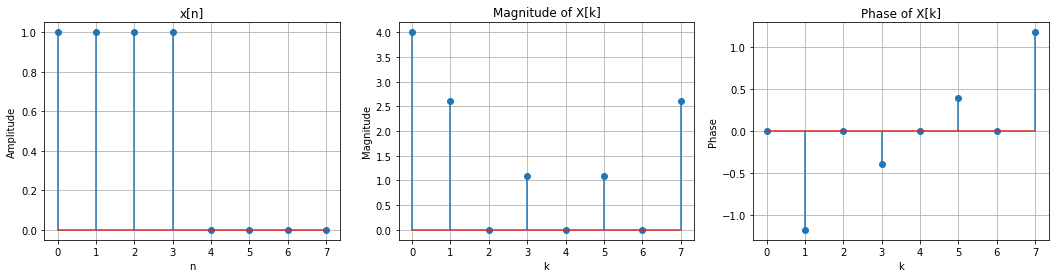

In [57]:
# Plotting the result
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.stem(np.arange(len(q7_x)),q7_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.grid()

plt.subplot(132)
plt.stem(np.arange(len(q7_x)),abs(q7_x3))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Magnitude of X[k]')
plt.grid()
           
plt.subplot(133)
plt.stem(np.arange(len(q7_x)),np.angle(q7_x3))
plt.xlabel('k')
plt.ylabel('Phase')
plt.title('Phase of X[k]')
plt.grid()       
           

plt.show()

### Q.8.
#### Decimation in Frequency (DIF)
#### For the sequence in the previous question, compute the DFT using 8- point radix-2 DIF-FFT algorithm. Plot the sequence and the resulting DFT. Compare the time taken to run the code with previous case.

In [58]:
q8_x = [1,1,1,1,0,0,0,0]

q8_x1 = np.zeros(len(q8_x),dtype=np.complex64)
q8_x2 = np.zeros(len(q8_x),dtype=np.complex64)
q8_x3 = np.zeros(len(q8_x),dtype=np.complex64)

q8_w = np.exp(-1j*2*np.pi/len(q8_x))

In [59]:
q8_DIF_start_n = time.time()

q8_x1[0] = q8_x[0] + q8_x[4]
q8_x1[1] = q8_x[1] + q8_x[5]
q8_x1[2] = q8_x[2] + q8_x[6]
q8_x1[3] = q8_x[3] + q8_x[7]
q8_x1[4] = (q8_x[0] - q8_x[4])*(q8_w**0)
q8_x1[5] = (q8_x[1] - q8_x[5])*(q8_w**1)
q8_x1[6] = (q8_x[2] - q8_x[6])*(q8_w**2)
q8_x1[7] = (q8_x[3] - q8_x[7])*(q8_w**3)


q8_x2[0] = q8_x1[0] + q8_x1[2]
q8_x2[1] = q8_x1[1] + q8_x1[3]
q8_x2[2] = (q8_x1[0] - q8_x1[2])*(q8_w**0)
q8_x2[3] = (q8_x1[1] - q8_x1[3])*(q8_w**2)

q8_x2[4] = q8_x1[4] + q8_x1[6]
q8_x2[5] = q8_x1[5] + q8_x1[7]
q8_x2[6] = (q8_x1[4] - q8_x1[6])*(q8_w**0)
q8_x2[7] = (q8_x1[5] - q8_x1[7])*(q8_w**2)


q8_x3[0] = q8_x2[0] + q8_x2[1]
q8_x3[1] = q8_x2[0] - q8_x2[1]

q8_x3[2] = q8_x2[2] + q8_x2[3]
q8_x3[3] = q8_x2[2] - q8_x2[3]

q8_x3[4] = q8_x2[4] + q8_x2[5]
q8_x3[5] = q8_x2[4] - q8_x2[5]

q8_x3[6] = q8_x2[6] + q8_x2[7]
q8_x3[7] = q8_x2[6] - q8_x2[7]

q8_DIF_end_n = time.time()

In [60]:
print('The FFT of the given signal using DIF is:\n')
for q8_xn,q8_xi in enumerate(q8_x3):
    print(f"X[{q8_xn}] = {q8_xi}")
    
print(f'\nThe time taken to calculate DIF is:{q8_DIF_end_n-q8_DIF_start_n}')

The FFT of the given signal using DIF is:

X[0] = (4+0j)
X[1] = 0j
X[2] = 0j
X[3] = 0j
X[4] = (1-2.4142136573791504j)
X[5] = (1+0.41421353816986084j)
X[6] = (1-0.41421353816986084j)
X[7] = (1+2.4142136573791504j)

The time taken to calculate DIF is:0.0009961128234863281


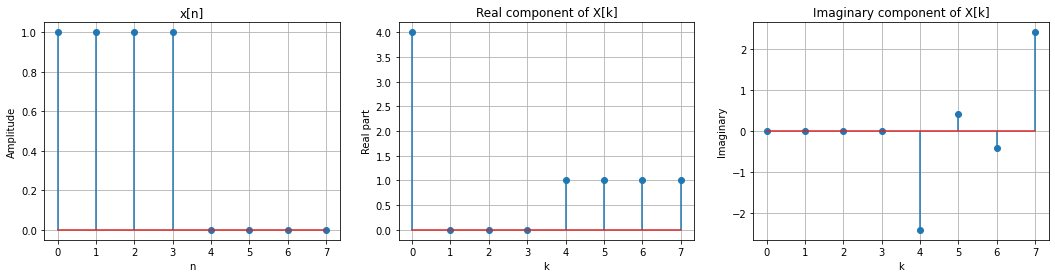

In [61]:
# Plotting the result
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.stem(np.arange(len(q8_x)),q8_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.grid()

plt.subplot(132)
plt.stem(np.arange(len(q8_x)),q8_x3.real)
plt.xlabel('k')
plt.ylabel('Real part')
plt.title('Real component of X[k]')
plt.grid()
           
plt.subplot(133)
plt.stem(np.arange(len(q8_x)),q8_x3.imag)
plt.xlabel('k')
plt.ylabel('Imaginary')
plt.title('Imaginary component of X[k]')
plt.grid()       
           

plt.show()

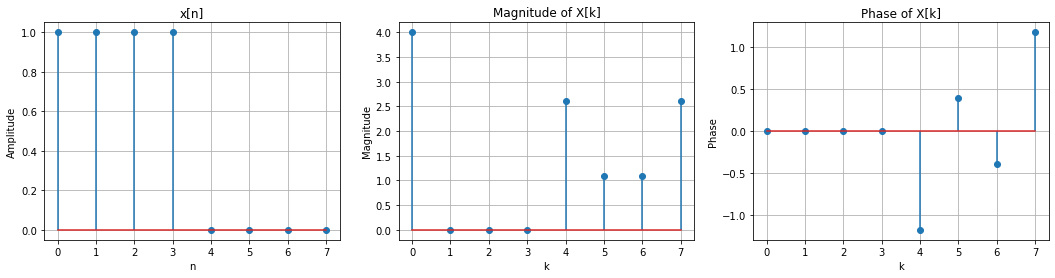

In [62]:
# Plotting the result
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.stem(np.arange(len(q8_x)),q8_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.grid()

plt.subplot(132)
plt.stem(np.arange(len(q8_x)),abs(q8_x3))
plt.xlabel('k')
plt.ylabel('Magnitude')
plt.title('Magnitude of X[k]')
plt.grid()
           
plt.subplot(133)
plt.stem(np.arange(len(q8_x)),np.angle(q8_x3))
plt.xlabel('k')
plt.ylabel('Phase')
plt.title('Phase of X[k]')
plt.grid()       
           

plt.show()

### Q.9.
#### Consider a system with input x[n] = {1, 2, 3, 1} and h[n] = {1, 1, 1}, compute the output sequence y[n] using
#### (a) Linear convolution
#### (b) Circular convolution
#### Write Python functions to implement both operations from the first principle. How can you implement circular convolution through the properties of FFT

In [63]:
q9_x = [1,2,3,1]
q9_h = [1,1,1]

In [64]:
def lin_conv(x,h):

    l1=len(x)
    l2=len(h)
    y = np.zeros(l1+l2-1) #array filled with zeros
    for i in np.arange(0,l1):
        for j in np.arange(0,l2):
            y[i+j] = y[i+j] + x[i] * h[j]
    return y

In [65]:
def circ_conv(x,h):
    
    l1 = len(x)
    l2 = len(h)
    l3 = l1 + l2 - 1
    x_padded = np.zeros(l3)
    h_padded = np.zeros(l3)

    x_padded[:l1] = x
    h_padded[:l2] = h
    
    y = np.zeros(l3)
    
    for n in range(l3):
        for k in range(l3):
            y[n]=y[n]+x_padded[k]*h_padded[n-k]
    return y

In [66]:
q9_lin_conv = lin_conv(q9_x,q9_h)

q9_cicr_conv = circ_conv(q9_x,q9_h)

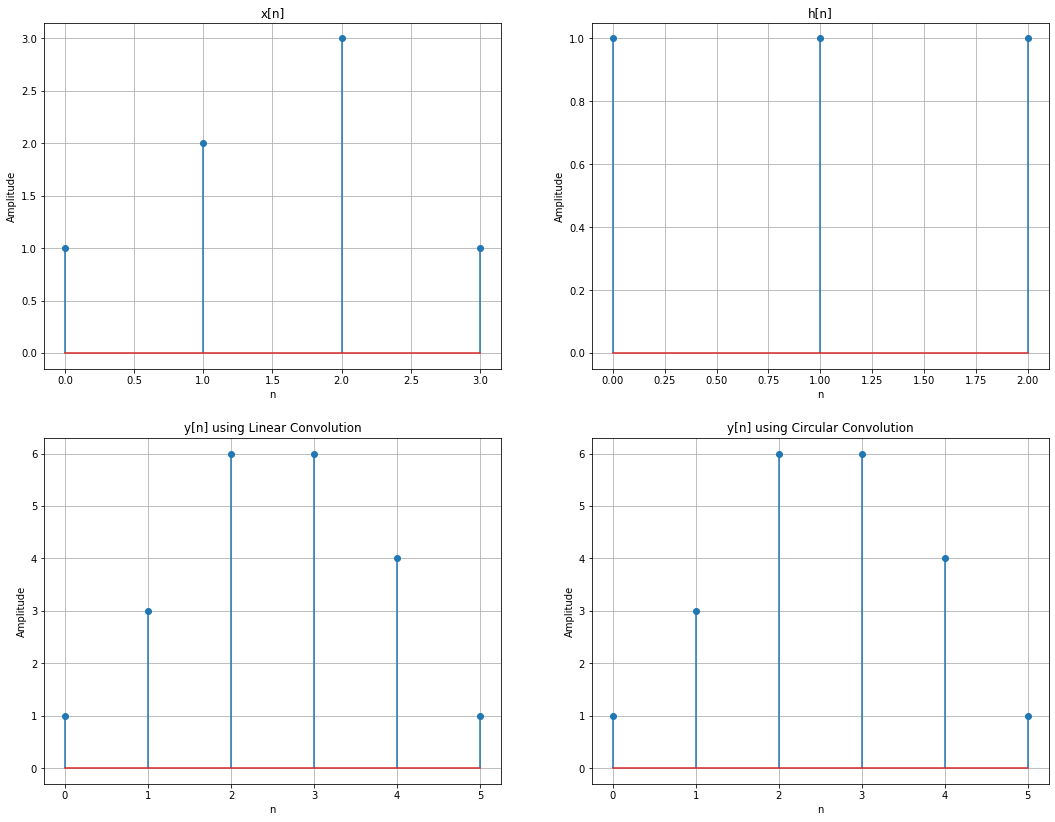

In [67]:
plt.figure(figsize=(18,14))

plt.subplot(221)
plt.stem(q9_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]')
plt.grid()

plt.subplot(222)
plt.stem(q9_h)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('h[n]')
plt.grid()

plt.subplot(223)
plt.stem(q9_lin_conv)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('y[n] using Linear Convolution')
plt.grid()

plt.subplot(224)
plt.stem(q9_cicr_conv)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('y[n] using Circular Convolution')
plt.grid()

plt.show()

In [68]:
# Circular convolution using FFT

q9_len_max = max(len(q9_x),len(q9_h))

q9_x_padded = np.concatenate((np.array(q9_x),np.zeros(q9_len_max-len(q9_x))))
q9_h_padded = np.concatenate((np.array(q9_h),np.zeros(q9_len_max-len(q9_h))))

In [69]:
q9_x_pad_fft = np.fft.fft(q9_x_padded)

q9_h_pad_fft = np.fft.fft(q9_h_padded)

q9_y__fft = np.multiply(q9_x_pad_fft,q9_h_pad_fft)

q9_y = np.fft.ifft(q9_y__fft)

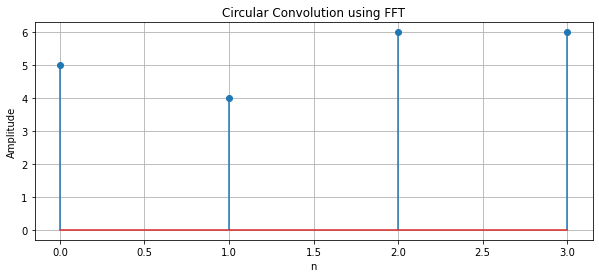

In [70]:
plt.figure(figsize=(10,4))

plt.stem(abs(q9_y))
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Circular Convolution using FFT')
plt.grid()